# Week 4 handin


Use only numpy (not pandas) in these exercises

## Exercise 1

In [1]:
import numpy as np

filename = '/home/jovyan/data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

# Value of the area code (second column, index 1): print(neighb[1])
neighb

{1: 'Indre By',
 2: 'Østerbro',
 3: 'Nørrebro',
 4: 'Vesterbro/Kgs. Enghave',
 5: 'Valby',
 6: 'Vanløse',
 7: 'Brønshøj-Husum',
 8: 'Bispebjerg',
 9: 'Amager Øst',
 10: 'Amager Vest',
 99: 'Udenfor'}

##### 3. Find out how many people lived in each of the 11 areas in 2015

In [2]:
dd = bef_stats_df
#mask = (dd[:,0] == 2015) & (dd[:,1] == 1)

people_amount = []

keys = []
values = []
for key in neighb:
    keys.append(key)
    values.append(neighb[key])

for key in keys:
    mask = (dd[:,0] == 2015) & (dd[:,1] == key)
    people_amount.append(np.sum(dd[mask][:,4]))
    

print('Population in each area: \n' + str(people_amount))


Population in each area: 
[51937, 75113, 78802, 61623, 51727, 39537, 43908, 53604, 55205, 64967, 3872]


##### 4. Make a bar plot to show the size of each city area from the smallest to the largest

(1.0, 10.0, 3000.0, 80000.0)

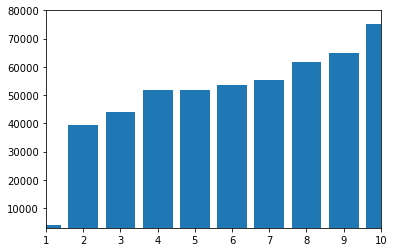

In [3]:
# Asuming by 'size' it means the size of the population

import matplotlib.pyplot as plt

people_amount.sort()

plt.bar(list(set(dd[:,1])), people_amount)
plt.axis([1,10,3000,80000])

##### 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [4]:
bool_mask = (dd[:,0] == 2015) & (dd[:,2] > 65)

# Alder: col 2 = 65
# copenhagen: col 1 = sum of 1-10
# aar: col 0 = 2015

old_people = np.sum(dd[bool_mask][:,4])

print('There are',old_people, 'people living in CPH over the age of 65.')

There are 55750 people living in CPH over the age of 65.


##### 6. How many of those were from the other nordic countries (not dk)

In [5]:
# Danes (STATKODE == 5100)

bool_mask2 = (dd[:,2] > 65) & (dd[:,0] == 2015) & (dd[:,3] == 5100)

old_people_danes = np.sum(dd[bool_mask2][:,4])

print(old_people_danes)

52299


##### 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

[47854, 47589, 47538, 47633, 47734, 48275, 49109, 49520, 50312, 50756, 51039, 51045, 50869, 50643, 50303, 50964, 51466, 53351, 55315, 57150, 58411, 59211, 60328, 61623]


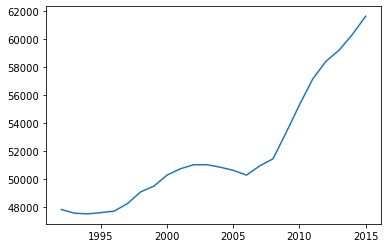

In [22]:
# Change in vesterbro 1992 to 2015 as list:
import matplotlib.pyplot as plt

years = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

vesterbro = []
numberV = 0

for y in years:
    maskV = (dd[:,1] == 4) & (dd[:,0] == y)
    numberV = np.sum(dd[maskV][:,4])
    vesterbro.append(numberV)

print(vesterbro)

plt.plot(years, vesterbro)
plt.show()
